Sklearn R2 Score: 0.4399387660024644
OLS R2 Score: -4.0832814680944916
Ridge R2 Score: -4.002666702111296
Sklearn MSE: 3094.4295991207027
OLS MSE: 28085.958607166423
Ridge MSE: 27640.54888615423
[ 73. 233.  97. 111. 277. 341.  64.  68.  65. 178. 142.  77. 244. 115.
 258.  87. 220.  86.  74. 132. 136. 220.  91. 235. 148. 317. 131.  84.
  65. 217. 306.  79. 158.  54. 123. 174. 237. 212. 179. 281. 187. 200.
  68. 163. 141. 202. 178. 242.  47. 131. 243. 142. 200.  89. 232.  55.
 253. 128. 104. 184. 110. 198.  81. 195. 150.  63. 151. 233. 178.  84.
 237. 109. 131. 252. 200. 160. 200.  51. 111.  77. 201.  88.  78. 243.
 268.  55. 270. 288.  91.]


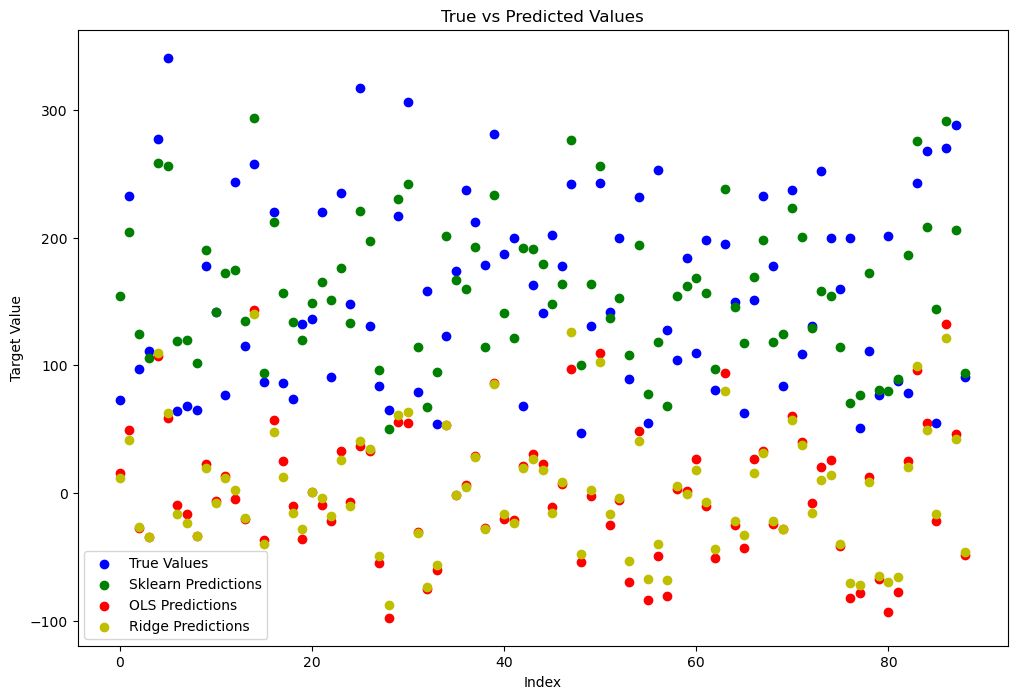

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets as datasets
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 

# 加载糖尿病数据集
dataset = datasets.load_diabetes()
x = dataset.data
y = dataset.target

# 分割训练和测试数据集，训练测试比例为4:1
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

# 使用sklearn的线性回归模型
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred_sklearn = regressor.predict(x_test)
r2_score_sklearn = r2_score(y_test, y_pred_sklearn)

# 最小二乘法（最大似然估计）
x1 = np.mat(x_train)  # 转换为矩阵
y1 = np.mat(y_train).T
x2 = np.mat(x_test)
y2 = np.mat(y_test).T

def OLSRegression(x, y):
    xTx = np.dot(x.T, x)
    w = np.dot(xTx.I, np.dot(x.T, y))  # 使用最小二乘法计算权重
    return w

w_ols = OLSRegression(x1, y1)  # 计算权重
y_pred_ols = np.dot(x2, w_ols)  # 预测
y_pred_ols = np.array(y_pred_ols)  # 转换为数组
r2_score_ols = r2_score(y_test, y_pred_ols)  # 计算R方

# 岭回归（最大后验估计）
def RidgeRegression(x, y, lam=0.1):
    m, n = x.shape
    ridge_eye = lam * np.eye(n)
    xTx = np.dot(x.T, x) + ridge_eye  # 使用岭回归公式计算权重
    w = np.dot(xTx.I, np.dot(x.T, y))
    return w

w_ridge = RidgeRegression(x1, y1)
y_pred_ridge = np.dot(x2, w_ridge)
y_pred_ridge = np.array(y_pred_ridge)
r2_score_ridge = r2_score(y_test, y_pred_ridge)


# 计算MSE
mse_sklearn = mean_squared_error(y_test, y_pred_sklearn)
mse_ols = mean_squared_error(y_test, y_pred_ols)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# 打印R方和MSE值
print("Sklearn R2 Score:", r2_score_sklearn)
print("OLS R2 Score:", r2_score_ols)
print("Ridge R2 Score:", r2_score_ridge)

print("Sklearn MSE:", mse_sklearn)
print("OLS MSE:", mse_ols)
print("Ridge MSE:", mse_ridge)

# 可视化
print(y_test)
# print(y_pred_sklearn)
# print(y_pred_ols.T)
# print(y_pred_ridge.T)
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_test)), y_test, label='True Values', c='b')
plt.scatter(range(len(y_pred_sklearn)), y_pred_sklearn, label='Sklearn Predictions', c='g')
plt.scatter(range(len(y_pred_ols)), y_pred_ols, label='OLS Predictions', c='r')
plt.scatter(range(len(y_pred_ridge)), y_pred_ridge, label='Ridge Predictions', c='y')
plt.legend()
plt.xlabel('Index')
plt.ylabel('Target Value')
plt.title('True vs Predicted Values')
plt.show()